# Import and Load Files

In [37]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files and json
invoices_df = pd.read_csv('/Users/macbookpro/Downloads/invoices.csv')
customers_df = pd.read_json('/Users/macbookpro/Downloads/customer.json')

# Dataframe

In [74]:
invoices_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [53]:
customers_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy Questions

#### 1.How many unique customers are in the dataset?

In [83]:
unique_customers_count = customers_df['id'].nunique()
print(f"Number of Unique Customers: {unique_customers_count}")

Number of Unique Customers: 5191


#### 2. What are the different categories of products available? How many unique categories are there?

In [91]:
product_categories = invoices_df['category'].unique()
print(f"Product categories: {product_categories}")

unique_categories_count = invoices_df['category'].nunique()
print(f"Number of unique categories: {unique_categories_count}")

Product categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


#### 3. Which payment method is the most popular? How many times was it used?

In [98]:
payment_method_counts = invoices_df['payment_method'].value_counts()
## Note: value_counts() method counts occurences of each unique value

most_popular_payment = payment_method_counts.idxmax()
## Note: This line finds the index (payment method) with the maximum count in the payment_method_counts Series.

num_times_used = payment_method_counts.max()
## Note: This line finds the maximum value in the payment_method_counts Series.

print(f"The most popular payment method is '{most_popular_payment}', used {num_times_used} times.")

The most popular payment method is 'Cash', used 44447 times.


# Medium Questions

#### 1. What are the three most popular categories, by total sales?

In [48]:
invoices_df['total_sales'] = invoices_df['quantity'] * invoices_df['price']
category_sales = invoices_df.groupby('category')['total_sales'].sum().reset_index()
top_categories = category_sales.sort_values(by='total_sales', ascending=False).head(3)

print("The top three categories by total sales are:")
for index, row in top_categories.iterrows():
    print(f"{row['category']}")

The top three categories by total sales are:
Clothing
Shoes
Technology


#### 2. What are the total sales attributed to customers over the age of 45?

In [153]:
customers_over_45 = customers_df[customers_df['age'] > 45]
customer_ids_over_45 = customers_over_45['id'].tolist()

sales_over_45 = invoices_df[invoices_df['customer_id'].isin(customer_ids_over_45)]
total_sales_over_45 = (sales_over_45['quantity'] * sales_over_45['price']).sum()

print(f"Total sales of cutomers over the age of 45: {total_sales_over_45}")

Total sales of cutomers over the age of 45: 82039768.15


#### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.

###### Graph 1: Monthly (for easier trend search)

In [ ]:
# Convert the invoice_date column to datetime
invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'], dayfirst=True)

# Calculate the total sales (quantity * price) and group by month for the trend to be more clearly seen
invoices_df['total_sales'] = invoices_df['quantity'] * invoices_df['price']
monthly_sales = invoices_df.resample('M', on='invoice_date')['total_sales'].sum()

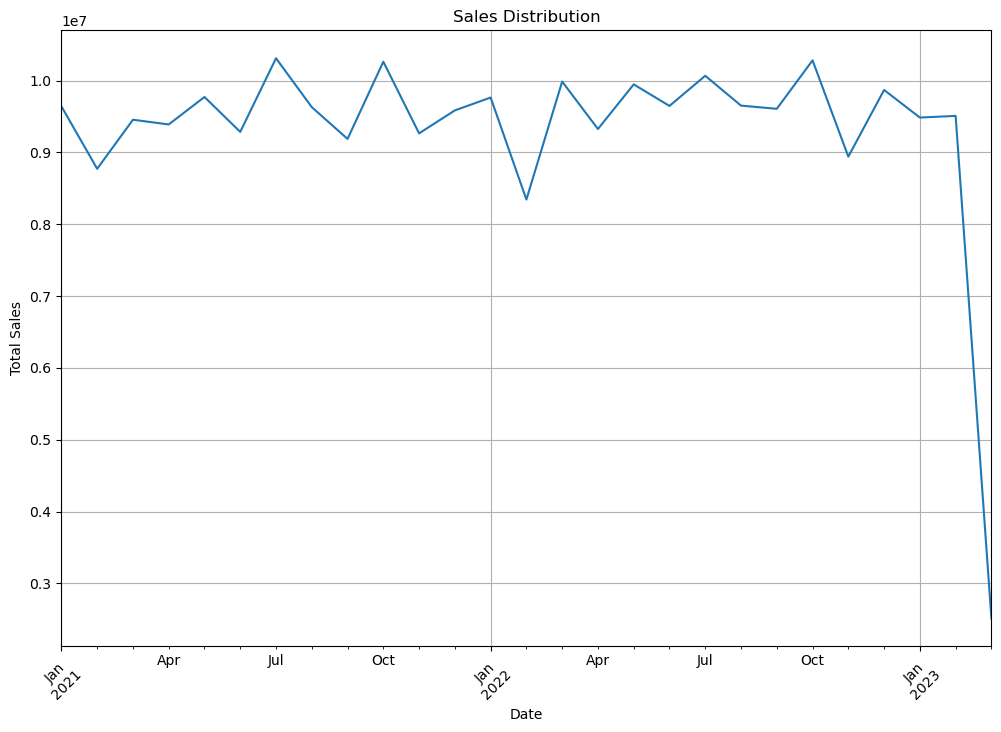

In [66]:
# Plot a line graph (line graph was used for better showcasing of trend)
plt.figure(figsize=(12, 8))
monthly_sales.plot(kind='line')
plt.grid()
plt.title('Sales Distribution')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

###### Graph 2: More specific graph showing trend per invoice date

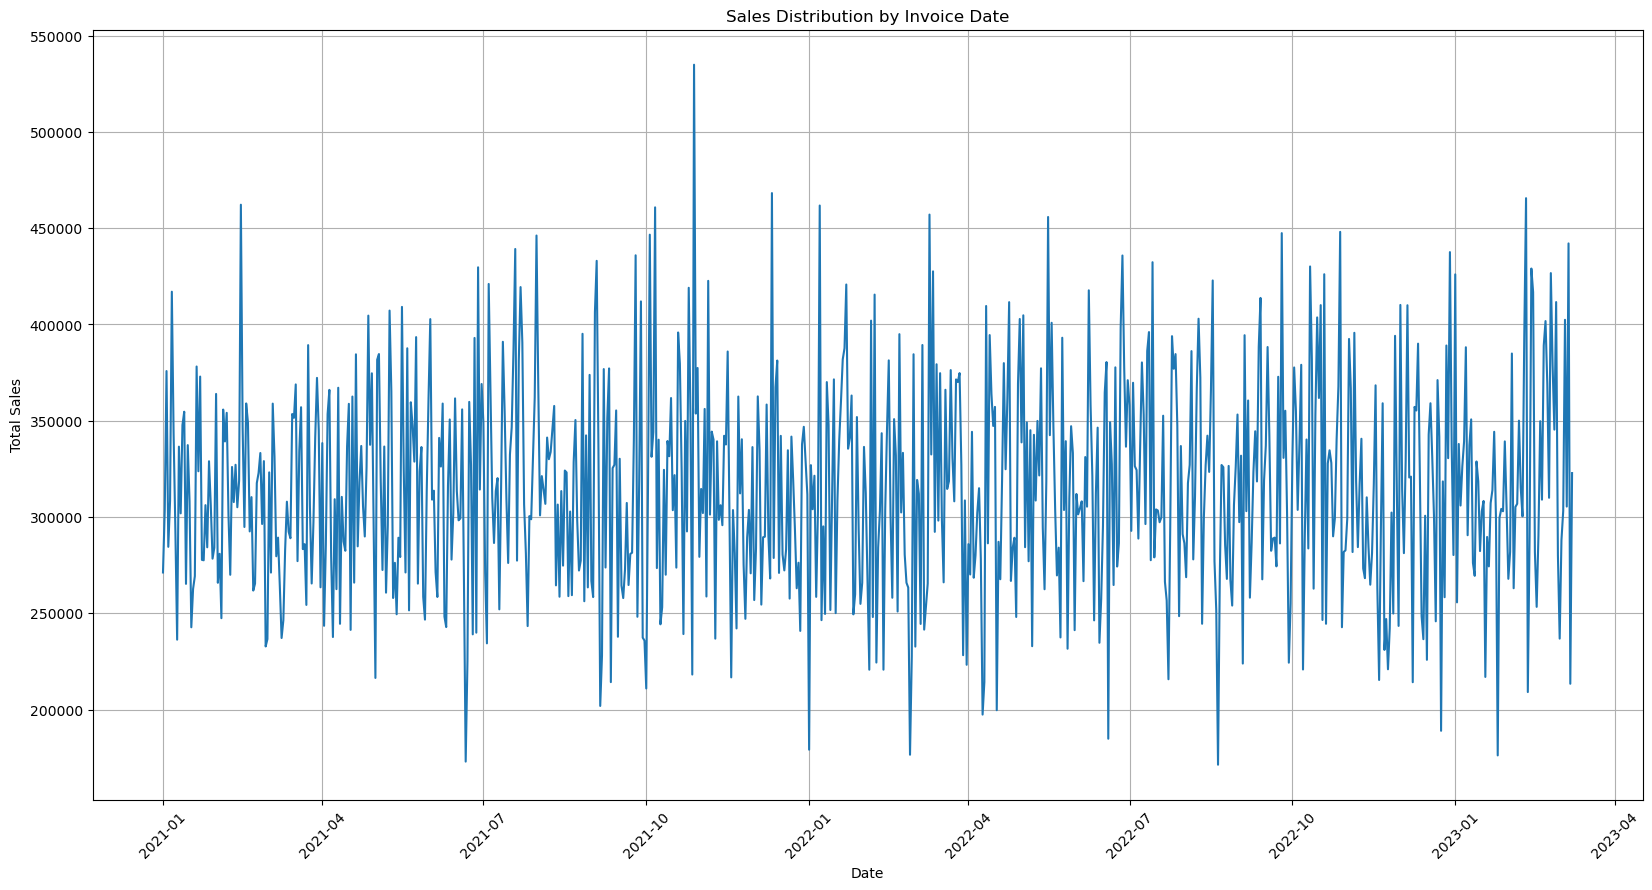

In [74]:
# Calculate Sales
invoices_df['sales'] = invoices_df['quantity'] * invoices_df['price']

# Convert Invoice Date to Datetime
invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'], format='%d/%m/%Y')

# Group by date and sum the sales
sales_by_date = invoices_df.groupby(invoices_df['invoice_date'].dt.date)['sales'].sum()

# Plot the data
plt.figure(figsize=(20, 10))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Sales Distribution by Invoice Date')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Hard Questions

#### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [23]:
# Calculate Sales
invoices_df['sales'] = invoices_df['quantity'] * invoices_df['price']

# Create 'AgeDecade' Column in customers_df
customers_df['AgeDecade'] = (customers_df['age'] // 10) * 10

# Merge DataFrames Using Correct Column Names
merged_df = invoices_df.merge(customers_df[['id', 'AgeDecade']], left_on='customer_id', right_on='id')

# Create a Pivot Table using the sales column
pivot_table = pd.pivot_table(merged_df, values='sales', index='category', columns='AgeDecade', aggfunc='sum', fill_value=0)

# Display the pivot table
print("Pivot Table showing Sales Breakdown across Categories and Age Decades:")
display(pivot_table)

Pivot Table showing Sales Breakdown across Categories and Age Decades:


AgeDecade,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
